# Hi guys !

# Import Labrairies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn import metrics
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings


In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

sns.set_style('dark')

# 1. Load Data

In [3]:
#Load the data set
train = pd.read_csv("../input/ml-lab-ii-c35/train.csv")
test = pd.read_csv("../input/ml-lab-ii-c35/test.csv")
submission = pd.read_csv("../input/ml-lab-ii-c35/sample.csv")
data_dict = pd.read_csv("../input/ml-lab-ii-c35/data_dictionary.csv")

train.shape, test.shape, submission.shape

((29733, 61), (9911, 60), (9911, 2))

#### Checking the description of the Data

In [4]:
#Checking the description of the Data
for i in data_dict.iterrows():
    print(i[1]['column'],':',i[1]['description'])

url : URL of the article (non-predictive)
timedelta : Days between the article publication and the dataset acquisition (non-predictive)
ntokenstitle : Number of words in the title
ntokenscontent : Number of words in the content
nuniquetokens : Rate of unique words in the content
nnonstop_words : Rate of non-stop words in the content
nnonstopuniquetokens : Rate of unique non-stop words in the content
num_hrefs : Number of links
numselfhrefs : Number of links to other articles published by Mashable
num_imgs : Number of images
num_videos : Number of videos
averagetokenlength : Average length of the words in the content
numkeywords : Number of keywords in the metadata
datachannelislifestyle : Is data channel 'Lifestyle'?
datachannelis_entertainment : Is data channel 'Entertainment'?
datachannelis_bus : Is data channel 'Business'?
datachannelis_socmed : Is data channel 'Social Media'?
datachannelis_tech : Is data channel 'Tech'?
datachannelis_world : Is data channel 'World'?
kwminmin : Wors

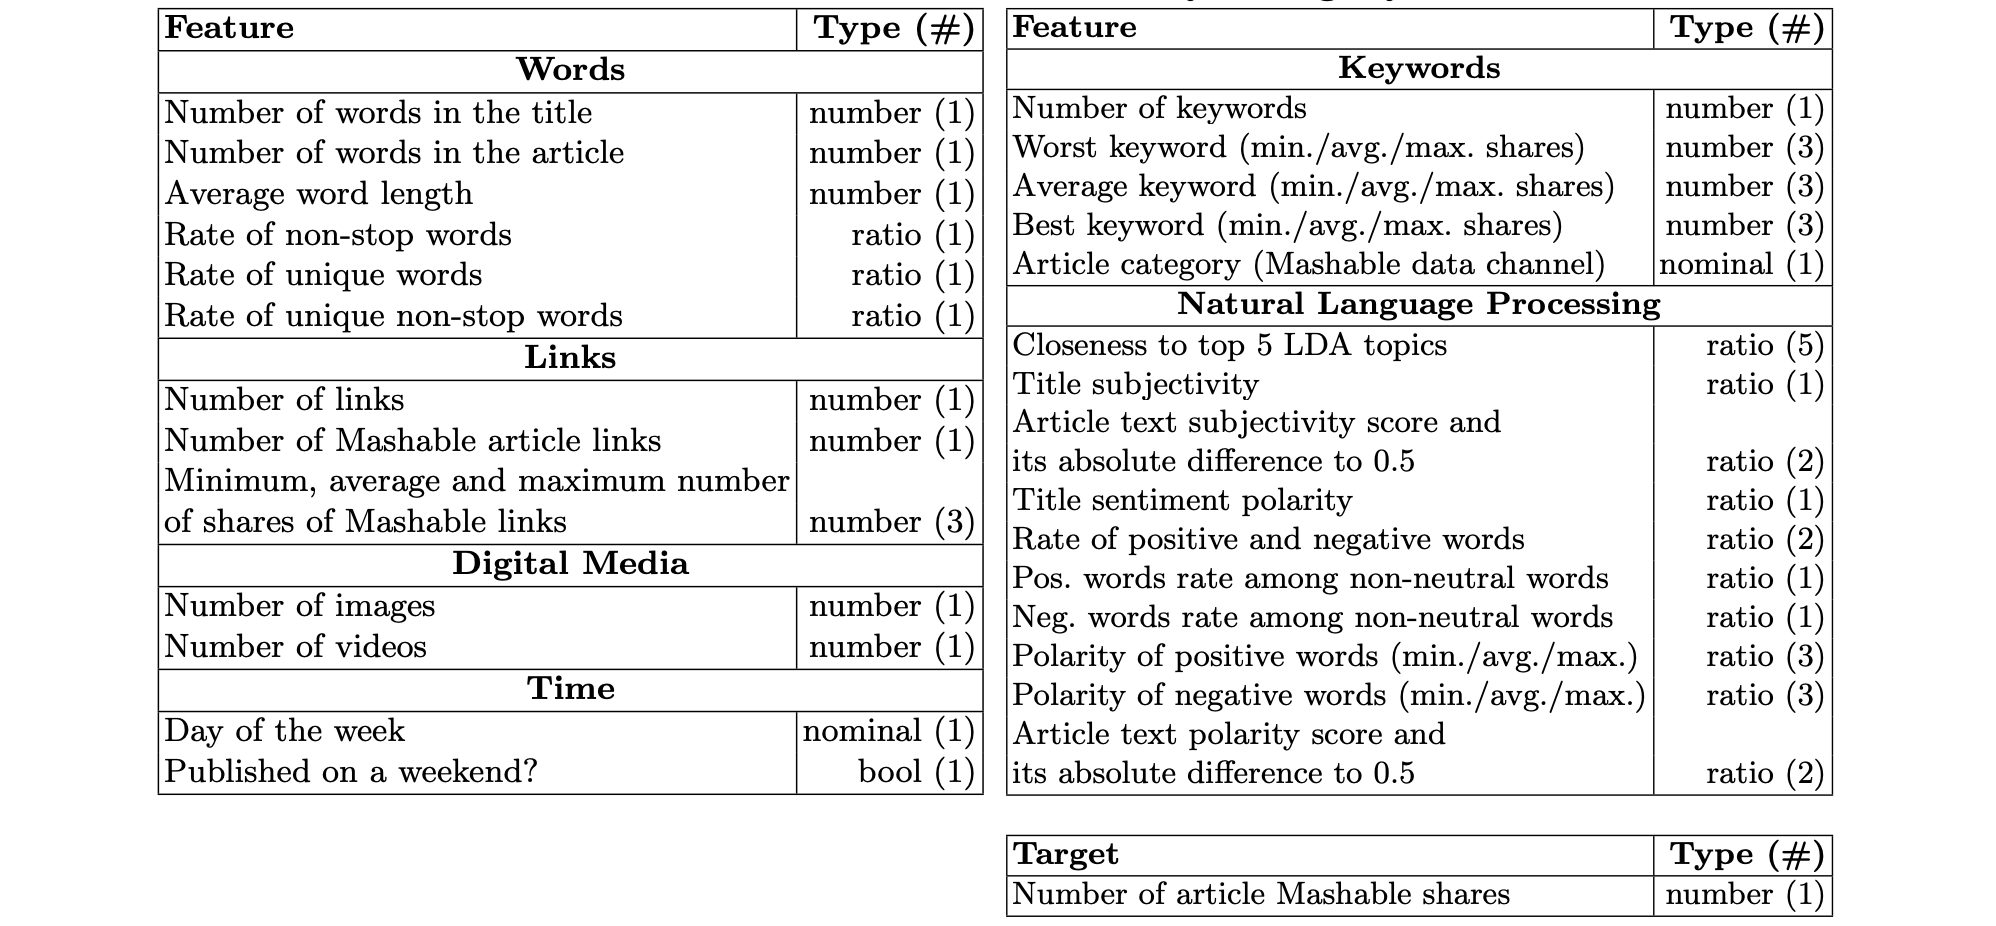

In [5]:
Image(filename="../input/ml-lab-ii-c35/features.png")

# 2. Data Understanding/Preprocessing

In [6]:
train.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28921.000000,25200.000000,24326.000000,29146.000000,29733.000000,29269.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,28649.000000,29277.000000,29649.000000,29596.000000,28218.000000,29616.000000,29428.000000,29052.000000,28760.000000,29449.000000,27971.000000,29409.000000,28752.000000,28980.000000,28179.000000,29434.000000,28867.000000,29642.000000,28237.000000,27565.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,27487.000000,29382.000000,28898.000000,28845.000000,29146.000000,29140.000000,28495.000000,29288.000000,29584.000000,29546.000000,28951.000000,29021.000000,29605.000000,29466.000000,28934.000000,28276.000000,29733.000000
mean,14866.000000,10.403861,545.376652,0.554071,1.004238,0.694586,10.866706,3.285397,4.512785,1.263364,4.542961,7.217978,0.052669,0.175327,0.158275,0.058386,0.185047,0.213870,25.835945,1154.769238,311.128475,13653.678571,753460.486214,259904.903376,1121.525349,5658.801071,3141.089645,3949.202204,10461.340237,6426.079278,0.167884,0.186784,0.187516,0.184073,0.142966,0.061905,0.068102,0.129766,0.185391,0.140411,0.217210,0.223688,0.233266,0.443130,0.118950,0.039554,0.016590,0.681376,0.287926,0.353170,0.095636,0.755106,-0.259057,-0.521207,-0.106996,0.282072,0.071137,0.342417,0.155628,3439.840581
std,8583.322113,2.122101,471.476136,4.064623,6.039790,3.768884,11.384882,3.851624,8.335517,4.158469,0.855936,1.912259,0.223375,0.380253,0.365005,0.234476,0.388342,0.410043,69.316700,4008.595967,623.943555,57864.532067,213165.450292,135215.399335,1136.661797,6094.277266,1323.734009,18771.379524,41548.116050,23705.054711,0.373770,0.389745,0.390332,0.387550,0.350044,0.240988,0.251926,0.336052,0.264106,0.218503,0.283237,0.295239,0.288963,0.117417,0.096957,0.017454,0.010783,0.191247,0.156156,0.105223,0.071699,0.248494,0.128085,0.291191,0.095238,0.324263,0.265052,0.188547,0.226089,12212.123341
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,7433.000000,9.000000,245.000000,0.471376,1.000000,0.626598,4.000000,1.000000,1.000000,0.000000,4.477124,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,444.000000,141.000000,0.000000,843300.000000,173296.428572,0.000000,3562.101631,2386.456742,636.000000,1100.000000,980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025060,0.025013,0.028571,0.028571,0.0285

In [7]:
test.describe()

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9637.000000,8308.000000,8053.000000,9699.000000,9911.000000,9743.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9554.000000,9775.000000,9884.000000,9879.000000,9407.000000,9877.000000,9804.000000,9686.000000,9619.000000,9805.000000,9383.000000,9809.000000,9587.000000,9650.000000,9431.000000,9811.000000,9624.000000,9885.000000,9420.000000,9208.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9159.000000,9813.000000,9638.000000,9594.000000,9736.000000,9726.000000,9515.000000,9740.000000,9846.000000,9852.000000,9676.000000,9660.000000,9872.000000,9831.000000,9639.000000,9472.000000
mean,34688.000000,10.383412,549.928968,0.530650,0.973161,0.672945,10.985576,3.354959,4.788029,1.216930,4.564074,7.247152,0.053779,0.186056,0.156594,0.059227,0.186056,0.208657,26.802700,1162.932023,316.377073,13484.666363,750309.609865,257208.816294,1103.119523,5624.433556,3118.432962,4180.605628,10194.214217,6404.476158,0.167206,0.184974,0.189694,0.181531,0.146093,0.061912,0.070170,0.133471,0.182224,0.143790,0.213653,0.224013,0.236320,0.444529,0.120264,0.039904,0.016653,0.685106,0.287537,0.355011,0.094734,0.762387,-0.260717,-0.523838,-0.108861,0.283380,0.073406,0.340646,0.156814
std,2861.203593,2.089690,470.007102,0.134487,0.161620,0.150488,11.247291,3.986800,8.739035,3.969329,0.808663,1.899628,0.225592,0.389171,0.363436,0.236061,0.389171,0.406369,70.461912,3479.758759,614.214479,58344.620280,216271.093148,134666.826994,1139.525955,5430.003000,1241.395311,22683.790838,41367.504458,26100.865905,0.373179,0.388297,0.392079,0.385477,0.353218,0.241008,0.255447,0.340101,0.259549,0.223274,0.278842,0.295061,0.289847,0.113554,0.096974,0.017357,0.010951,0.187598,0.155910,0.102967,0.070313,0.245353,0.126935,0.288588,0.096359,0.324447,0.267570,0.189324,0.226617
min,29733.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018183,0.018183,0.018182,0.018183,0.018201,0.000000,-0.373930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,32210.500000,9.000000,250.000000,0.469311,1.000000,0.623569,4.000000,1.000000,1.000000,0.000000,4.483051,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,451.000000,143.541667,0.000000,843300.000000,171000.000000,0.000000,3562.101631,2372.101851,654.000000,1100.000000,989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025032,0.025011,0.025477,0.025622,0.028574,0.396237,0.058032,0.028777,0.009647,0.600000,0.183673,0.308717,0.050000,0.600000,-0.329785,-0.700000,-0.1

In [8]:
train

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0,http://mashable.com/2013/03/15/build-arduino-p...,8.0,211.0,0.629808,1.0,0.800000,6.0,3.0,0.0,0.0,4.606635,8.0,0.0,0.0,0.0,0.0,1.0,0.0,217.0,2300.0,797.714286,0.0,617900.0,115912.500000,0.000000,5103.042553,2568.648709,2000.0,2000.0,2000.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025025,0.025047,0.025012,0.025377,0.899540,0.647421,0.182837,0.033175,0.004739,0.875000,0.125000,0.413435,0.100000,0.600000,-0.100000,NaN,-0.100000,1.000000,0.600000,0.500000,0.600000,36700
1,1,http://mashable.com/2013/09/04/edible-bar-codes/,12.0,416.0,0.603535,1.0,0.663580,22.0,7.0,1.0,16.0,5.004808,7.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,768.0,259.400000,0.0,NaN,169071.428571,0.000000,3339.790199,2112.665837,658.0,13700.0,4477.25,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.170984,0.029080,0.028572,0.742792,0.028572,0.449248,0.148915,0.038462,NaN,0.800000,0.200000,0.324716,0.033333,1.000000,-0.228621,-0.5000,-0.071429,0.000000,0.000000,0.500000,0.000000,24200
2,2,http://mashable.com/2014/06/20/non-player-char...,7.0,229.0,0.638393,1.0,0.746479,9.0,4.0,1.0,1.0,4.829694,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1100.0,472.625000,4800.0,843300.0,204837.500000,1575.400000,3562.101631,2589.125480,4800.0,NaN,4800.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.025046,0.025041,0.025001,0.025000,0.899912,0.353209,0.116600,0.034934,0.021834,NaN,0.384615,0.354545,0.050000,1.000000,-0.260833,-0.5000,-0.166667,0.000000,0.000000,0.500000,0.000000,945
3,3,http://mashable.com/2014/08/06/food-art-vine-c...,9.0,473.0,0.542373,1.0,0.752809,7.0,0.0,1.0,1.0,4.634249,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,447.0,150.400000,0.0,843300.0,229728.571429,0.000000,3504.933802,NaN,0.0,0.0,0.00,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.028580,0.028581,0.028577,0.166853,0.747408,0.548957,0.254370,0.065539,0.010571,0.861111,0.138889,0.356253,0.136364,0.700000,-0.167500,-0.2500,-0.100000,0.000000,0.000000,0.500000,0.000000,844
4,4,http://mashable.com/2014/12/17/blackberry-clas...,13.0,1097.0,0.505213,1.0,0.676343,10.0,4.0,14.0,0.0,4.678213,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1200.0,299.250000,33100.0,843300.0,381925.000000,2822.635182,5418.750000,3668.285640,1400.0,2300.0,2000.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050004,0.052276,0.050148,0.797536,0.050036,0.436525,0.156793,0.041021,0.010027,0.803571,0.196429,0.366255,0.033333,1.000000,-0.193182,-0.3125,-0.100000,0.383333,0.166667,0.116667,0.166667,551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29728,29728,http://mashable.com/2013/09/03/microsoft-nokia...,8.0,587.0,0.474606,1.0,0.661392,9.0,3.0,1.0,0.0,4.563884,7.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,531.0,217.571429,3100.0,843300.0,232657.142857,1082.636364,3256.405327,2081.580542,3100.0,6100.0,4600.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344328,0.029109,0.028572,0.028572,0.569420,0.484231,0.176979,0.035775,0.015332

In [9]:
test

,id,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,29733,http://mashable.com/2014/12/05/2014-cant-unsee/,10.0,564.0,0.505618,1.0,0.637394,21.0,1.0,0.0,3.0,4.723404,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,442.0,128.000000,23700.0,843300.0,340780.000000,2154.061235,3702.951220,2994.958581,2300.0,2300.0,2300.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040000,0.040069,0.839887,0.040038,0.040006,0.442277,0.053681,0.037234,0.019504,0.656250,0.343750,0.269218,0.062500,0.6,-0.263636,-0.700000,-0.100,1.000000,0.000000,0.500000,0.000000
1,29734,http://mashable.com/2014/01/02/twitter-new-yea...,12.0,1127.0,0.431298,1.0,0.621622,10.0,6.0,11.0,0.0,4.360248,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,733.0,254.875000,6300.0,843300.0,140325.000000,1671.078652,4040.166667,2704.175559,3500.0,6300.0,4900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025053,0.025040,0.025003,0.025000,0.899904,0.425115,0.159958,0.042591,0.014197,0.750000,0.250000,0.420924,0.033333,1.0,-0.243341,-0.714286,NaN,0.000000,0.000000,0.500000,0.000000
2,29735,http://mashable.com/2014/06/11/gopro-value-3-b...,10.0,400.0,0.564232,1.0,0.698795,1.0,0.0,1.0,1.0,4.765000,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,784.0,283.285714,6800.0,843300.0,166071.428571,1828.500000,3575.518291,2645.535689,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.028572,0.885666,0.028572,0.028620,0.028572,0.548466,0.011693,0.047500,0.032500,0.593750,0.406250,0.312286,0.136364,0.5,-0.354808,-0.800000,-0.150,0.000000,0.000000,0.500000,0.000000
3,29736,http://mashable.com/2014/10/08/spanish-ebola-d...,12.0,798.0,0.435279,1.0,0.613054,2.0,2.0,3.0,1.0,3.984962,9.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,796.0,284.222222,1800.0,843300.0,325322.222222,1059.333333,7735.494465,3966.507513,6300.0,6300.0,6300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022223,0.495422,0.022223,0.437909,0.022223,0.537687,0.028463,0.047619,0.033835,NaN,0.415385,0.359650,0.136364,1.0,-0.362912,-1.000000,-0.050,0.000000,0.000000,0.500000,0.000000
4,29737,http://mashable.com/2014/02/09/jennifer-lawren...,11.0,1010.0,0.464503,1.0,0.611727,32.0,2.0,1.0,0.0,5.180198,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,269.0,91.714286,0.0,843300.0,214137.500000,0.000000,3583.632001,2030.692327,1500.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.025536,0.025047,0.899314,0.025101,0.025002,0.412513,0.104127,0.025743,0.013861,0.650000,0.350000,0.375991,0.100000,0.8,-0.264286,-0.500000,NaN,0.000000,0.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9906,39639,http://mashable.com/2014/09/18/twitter-iphone-...,8.0,559.0,0.527514,1.0,0.618132,28.0,3.0,26.0,0.0,4.354204,9.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,330.0,176.888889,34300.0,843300.0,324855.555556,3479.478861,8880.022321,5955.427525,4100.0,4100.0,4100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.022223,0.022392,0.022222,0.910941,0.022222,0.576608,0.156946,0.042934,0.021467,0.666667,0.333333,0.

#### Check Missing values

- Data Train

In [10]:
#checking the Number of Null values
missing_data_percent=round(100 *(train.isnull().sum()/len(train.index)),2)
missing_data_percent

id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.73
num_self_hrefs                   15.25
num_imgs                         18.19
num_videos                        1.97
average_token_length              0.00
num_keywords                      1.56
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.65
kw_max_min                        1.53
kw_avg_min                        0.28
kw_min_max                        0.46
kw_max_max                        5.10
kw_avg_max                        0.39
kw_min_avg               

- Data Test

In [11]:
#checking the Number of Null values
missing_data_percent=round(100 *(test.isnull().sum()/len(test.index)),2)
missing_data_percent

id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.76
num_self_hrefs                   16.17
num_imgs                         18.75
num_videos                        2.14
average_token_length              0.00
num_keywords                      1.70
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.60
kw_max_min                        1.37
kw_avg_min                        0.27
kw_min_max                        0.32
kw_max_max                        5.09
kw_avg_max                        0.34
kw_min_avg               

In [12]:
train.isnull().sum().sort_values(ascending=False)

num_imgs                         5407
num_self_hrefs                   4533
global_subjectivity              2246
is_weekend                       2168
self_reference_max_shares        1762
weekday_is_wednesday             1554
kw_max_max                       1515
weekday_is_sunday                1496
abs_title_sentiment_polarity     1457
avg_positive_polarity            1238
kw_min_min                       1084
weekday_is_monday                 981
kw_avg_avg                        973
global_rate_negative_words        888
weekday_is_friday                 866
global_rate_positive_words        835
num_hrefs                         812
abs_title_subjectivity            799
min_negative_polarity             782
weekday_is_tuesday                753
max_negative_polarity             712
kw_max_avg                        681
rate_negative_words               593
num_videos                        587
rate_positive_words               587
num_keywords                      464
kw_max_min  

In [13]:
test.isnull().sum().sort_values(ascending=False)

num_imgs                         1858
num_self_hrefs                   1603
global_subjectivity               752
is_weekend                        703
self_reference_max_shares         528
kw_max_max                        504
weekday_is_sunday                 491
weekday_is_wednesday              480
abs_title_sentiment_polarity      439
avg_positive_polarity             396
kw_min_min                        357
weekday_is_monday                 324
global_rate_negative_words        317
kw_avg_avg                        292
weekday_is_friday                 287
num_hrefs                         274
global_rate_positive_words        273
abs_title_subjectivity            272
weekday_is_tuesday                261
max_negative_polarity             251
min_negative_polarity             235
kw_max_avg                        225
num_videos                        212
rate_negative_words               185
rate_positive_words               175
min_positive_polarity             171
num_keywords

# 3. Data Cleaning

#### Drop non-predictive variable

In [14]:
def drop_url_cols(data):
    return data.drop('url',1)
    
train = drop_url_cols(train)
test = drop_url_cols(test)

#### To check each variable datatype 

In [15]:
train.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   n_tokens_title                 29733 non-null  float64
 2   n_tokens_content               29733 non-null  float64
 3   n_unique_tokens                29733 non-null  float64
 4   n_non_stop_words               29733 non-null  float64
 5   n_non_stop_unique_tokens       29733 non-null  float64
 6   num_hrefs                      28921 non-null  float64
 7   num_self_hrefs                 25200 non-null  float64
 8   num_imgs                       24326 non-null  float64
 9   num_videos                     29146 non-null  float64
 10  average_token_length           29733 non-null  float64
 11  num_keywords                   29269 non-null  float64
 12  data_channel_is_lifestyle      29733 non-null 

In [16]:
test.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             9911 non-null   int64  
 1   n_tokens_title                 9911 non-null   float64
 2   n_tokens_content               9911 non-null   float64
 3   n_unique_tokens                9911 non-null   float64
 4   n_non_stop_words               9911 non-null   float64
 5   n_non_stop_unique_tokens       9911 non-null   float64
 6   num_hrefs                      9637 non-null   float64
 7   num_self_hrefs                 8308 non-null   float64
 8   num_imgs                       8053 non-null   float64
 9   num_videos                     9699 non-null   float64
 10  average_token_length           9911 non-null   float64
 11  num_keywords                   9743 non-null   float64
 12  data_channel_is_lifestyle      9911 non-null   f

#### Checking if there are columns with one unique value since it won't affect our analysis

In [17]:
train.nunique(dropna=True)

id                               29733
n_tokens_title                      20
n_tokens_content                  2250
n_unique_tokens                  21820
n_non_stop_words                  1404
n_non_stop_unique_tokens         18703
num_hrefs                          124
num_self_hrefs                      55
num_imgs                            86
num_videos                          52
average_token_length             23555
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          23
kw_max_min                        1038
kw_avg_min                       14367
kw_min_max                         957
kw_max_max                          30
kw_avg_max                       24057
kw_min_avg                       12615
kw_max_avg               

As, we can see we don't have any unique value columns so will not do anything with that¶


In [18]:
# imputing missing values
impute_features = missing_data_percent[missing_data_percent.gt(0)].index
impute_features

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

#### Imputed with KNN Imputer

In [19]:
imp= KNNImputer()
data = train.copy()
data[impute_features] = imp.fit_transform(data[impute_features])

In [20]:
#Checking the Null values again 
round(100 *(data.isnull().sum()/len(data.index)),2)

id                               0.0
n_tokens_title                   0.0
n_tokens_content                 0.0
n_unique_tokens                  0.0
n_non_stop_words                 0.0
n_non_stop_unique_tokens         0.0
num_hrefs                        0.0
num_self_hrefs                   0.0
num_imgs                         0.0
num_videos                       0.0
average_token_length             0.0
num_keywords                     0.0
data_channel_is_lifestyle        0.0
data_channel_is_entertainment    0.0
data_channel_is_bus              0.0
data_channel_is_socmed           0.0
data_channel_is_tech             0.0
data_channel_is_world            0.0
kw_min_min                       0.0
kw_max_min                       0.0
kw_avg_min                       0.0
kw_min_max                       0.0
kw_max_max                       0.0
kw_avg_max                       0.0
kw_min_avg                       0.0
kw_max_avg                       0.0
kw_avg_avg                       0.0
s

Now we can see that there are no NULL values so we can now go for EDA Analysis

# 4. EDA Analysis

#### Target Exploration

Since the range of number of share is too large , we will perform log transform and then check the distribution


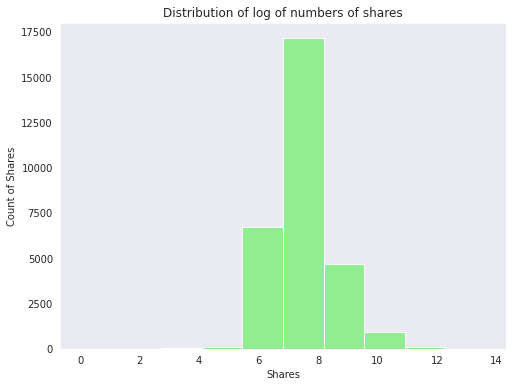

In [21]:
# choose features and target
X = data.iloc[:,2:60] # select all columns except URL and TARGET
y = data["shares"].values.ravel() #target:number of shares

plt.figure(figsize= (8,6))
plt.hist(np.log(y),color="lightgreen")
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of log of numbers of shares")
plt.show()

#### Plotting the correlations for each feature for bivariate analysis

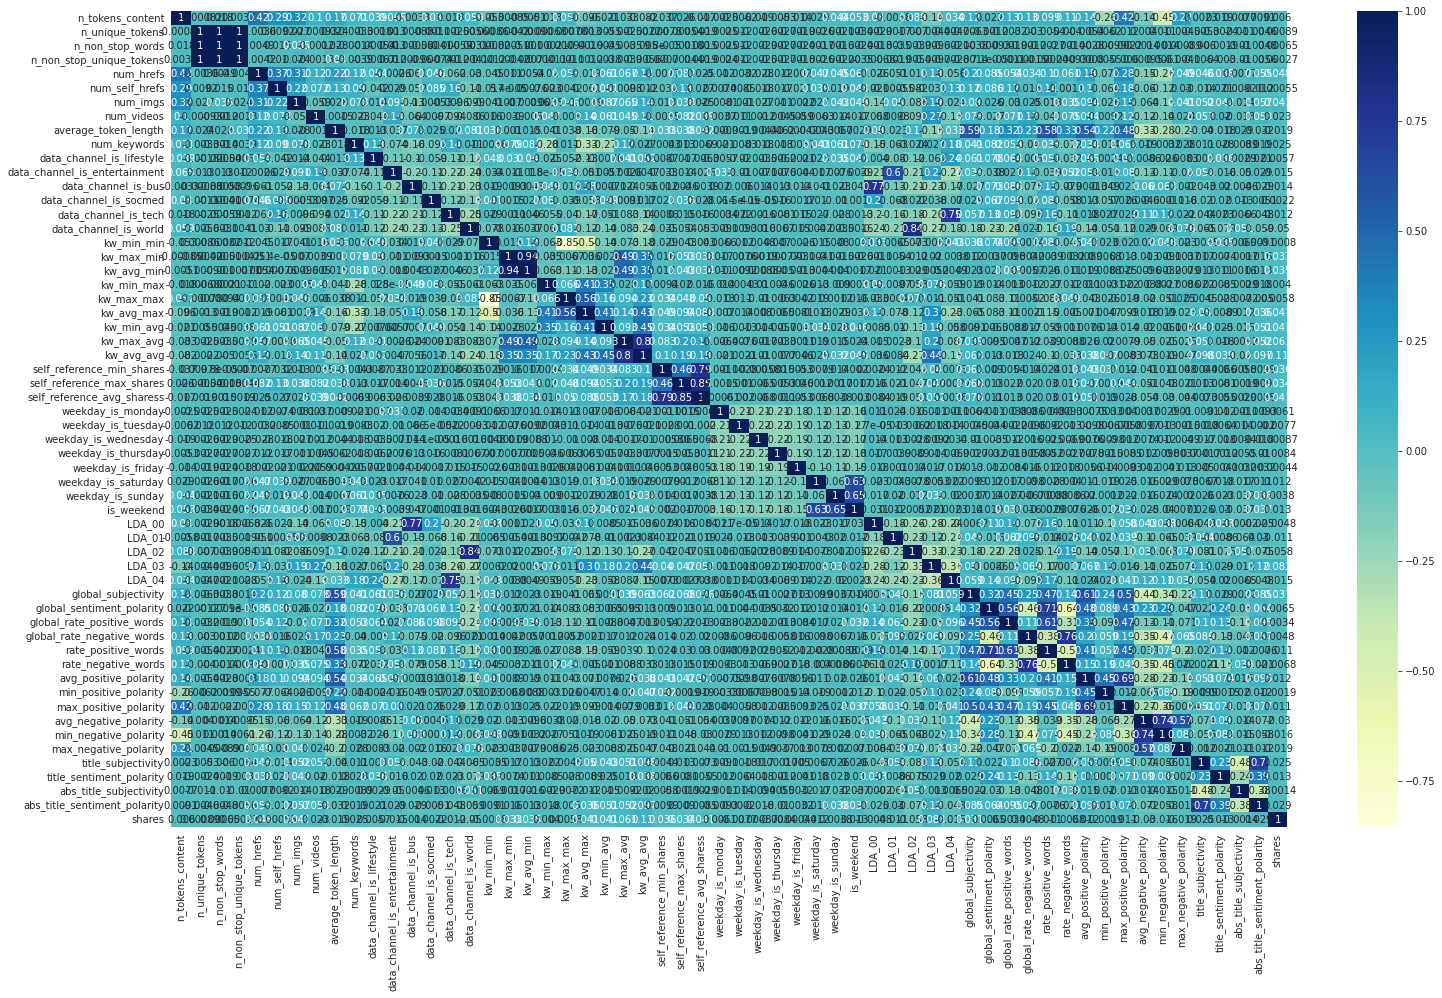

In [22]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(X.corr(),cmap="YlGnBu", annot=True)
plt.show()

#### Log Transform

All the features are almost positively skewed, we'll log transform the features to neutralize the positive skewness in the dataset.

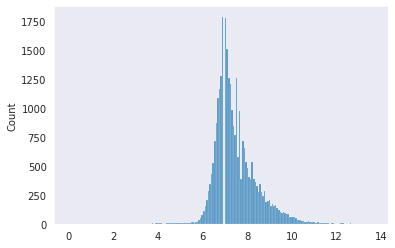

In [23]:
y = np.log(y)
sns.histplot(y)
plt.show()

# 5. Modeling

#### Feature Engineering and Selection

In [24]:
# total Number of visual content in the article (images and videos)
train['total_visual'] = train['num_imgs']+train['num_videos']

# total Number of visual content in the article (images and videos) in unseen data
test['total_visual'] = test['num_imgs']+test['num_videos']

#### Split into train test

In [25]:
# Dependent and independent variables
X = train.drop(['shares','id'],1)
y = train['shares']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20813, 59) (20813,)
(8920, 59) (8920,)


In [27]:
# As per our observations in dataframe describe as well as EDA, it is best to cap the variables at 99 and 1 percentile as there are highly skewed outliers
X_train_cap = X_train.copy()
X_test_cap = X_test.copy()

for col in X_train_cap.columns:
    percentiles_1_99 = X_train_cap[col].quantile([0.01,0.99]).values
    X_train_cap[col] = np.clip(X_train_cap[col], percentiles_1_99[0], percentiles_1_99[1])
    
for col in X_test_cap.columns:
    percentiles_1_99 = X_test_cap[col].quantile([0.01,0.99]).values
    X_test_cap[col] = np.clip(X_test_cap[col], percentiles_1_99[0], percentiles_1_99[1])

In [28]:
# Columns in X with just 2 value counts (eg: 1 and 0)
bi_value_colx = X.loc[:,train.nunique()==2].columns

# Columns in X with more than 2 value counts
multi_value_colx = X.drop(bi_value_colx,1).columns
print(bi_value_colx)
print(multi_value_colx)

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'],
      dtype='object')
Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'g

In [29]:
# Creating pipelines for column tranformer
bi_transformer = Pipeline(
    steps=[('imputer',SimpleImputer(strategy='most_frequent'))]
)

multi_transformer = Pipeline(
    steps=[('imputer_m',SimpleImputer(strategy='median')),('scaler',StandardScaler())]
)

# Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('bi',bi_transformer,bi_value_colx),
        ('multi',multi_transformer,multi_value_colx)
    ])

#### Metric report function

In [30]:
#Code reference - https://stackoverflow.com/a/57239611/4755954

def regression_results(y_test, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

#### Search the best Model

In [31]:
# Calling different base models, pca etc for pipeline
pca = PCA(0.90)
poly = PolynomialFeatures(degree=2)

### LinearRegression

In [32]:
# Defining Model
lr = LinearRegression()

# Creating pipeline
pipe_lr = Pipeline(
    steps=[('preprocessor',preprocessor),
          ('pca',pca),
          ('poly',poly),
          ('model_lr',lr)])

# Fitting data
pipe_lr.fit(X_train_cap,y_train)

# Predicting using pipe
train_pred = pipe_lr.predict(X_train_cap)
test_pred = pipe_lr.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.0432
r2:  0.0432
MAE:  3355.1832
MSE:  153008345.4719
RMSE:  12369.6542

 Test metrics
explained_variance:  0.0025
r2:  0.0025
MAE:  3338.8789
MSE:  123633824.8849
RMSE:  11119.0748


### Ridge Regression


In [33]:
# Defining Model
ridge = Ridge(random_state=0)

# Creating pipeline
pipe_ri = Pipeline(
    steps=[('preprocessor',preprocessor),
           ('model_ri',ridge)]        
)

# Setting hyperparameters
params_ri = [
    {'model_ri__alpha':[0.0001,0.001,0.01,0.1,1,3,5,6,7,8]}
]

# GridSearch cross validation
search_ri = GridSearchCV(pipe_ri,params_ri,cv=5,n_jobs=-1,verbose=True,scoring = 'neg_mean_squared_error',)

pipe_ri_cv = search_ri.fit(X_train_cap,y_train)

print("Best parameter (CV score=%0.3f):" % pipe_ri_cv.best_score_)
print(pipe_ri_cv.best_params_)

train_pred = pipe_ri_cv.predict(X_train_cap)
test_pred = pipe_ri_cv.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter (CV score=-157631173.140):
{'model_ri__alpha': 8}
Train metrics
explained_variance:  0.0217
r2:  0.0217
MAE:  3162.7364
MSE:  156457172.4757
RMSE:  12508.2842

 Test metrics
explained_variance:  0.0216
r2:  0.0216
MAE:  3091.6184
MSE:  121271840.8094
RMSE:  11012.3495


### Lasso Regression

In [34]:
# Defining Model
lasso = Lasso(random_state=0)

# Creating pipeline
pipe_la = Pipeline(
    steps=[('preprocessor',preprocessor),
           ('model_la',lasso)]
)

# Setting hyperparameters
params_la = [
    {'model_la__alpha':[0.0001,0.001,0.01,0.1,1,3,5,8,10,50,100],
    'model_la__max_iter':[1000,2000],
    'model_la__selection':['random','cyclic']}
]

# GridSearch cross validation
search_la = GridSearchCV(pipe_la,param_grid=params_la,n_jobs=-1,cv=4,verbose=1,scoring = 'neg_mean_squared_error',)

pipe_la_cv = search_la.fit(X_train_cap,y_train)

print("Best parameter (CV score=%0.3f):" % pipe_la_cv.best_score_)
print(pipe_la_cv.best_params_)

train_pred = pipe_la_cv.predict(X_train_cap)
test_pred = pipe_la_cv.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Fitting 4 folds for each of 44 candidates, totalling 176 fits
Best parameter (CV score=-157229858.844):
{'model_la__alpha': 50, 'model_la__max_iter': 1000, 'model_la__selection': 'cyclic'}
Train metrics
explained_variance:  0.0198
r2:  0.0198
MAE:  3149.1435
MSE:  156756316.394
RMSE:  12520.2363

 Test metrics
explained_variance:  0.0214
r2:  0.0214
MAE:  3067.6103
MSE:  121294499.5847
RMSE:  11013.3782


### XGBRegressor

In [35]:
xg = XGBRegressor()

# Creating pipeline
pipe_xgb = Pipeline(
    steps=[('preprocessor',preprocessor),
          #('pca',pca),
          #('poly',poly),
          ('model_xg',xg)])

pipe_xgb.fit(X_train,y_train)

train_pred = pipe_xgb.predict(X_train_cap)
test_pred = pipe_xgb.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.7516
r2:  0.7515
MAE:  2060.5961
MSE:  39735790.2693
RMSE:  6303.6331

 Test metrics
explained_variance:  -0.1059
r2:  -0.1059
MAE:  3291.2269
MSE:  137074978.9245
RMSE:  11707.9024


### LGBMRegressor

In [36]:
# Defining Model
lgbm = LGBMRegressor()

# Creating pipeline
pipe_lgbm = Pipeline(
    steps=[('preprocessor',preprocessor),
          ('pca',pca),
          ('poly',poly),
          ('model_lgbm',lgbm)])

pipe_lgbm.fit(X_train,y_train)

train_pred = pipe_lgbm.predict(X_train_cap)
test_pred = pipe_lgbm.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.5081
r2:  0.5081
MAE:  2753.7521
MSE:  78666241.2398
RMSE:  8869.3991

 Test metrics
explained_variance:  -0.0418
r2:  -0.042
MAE:  3386.5589
MSE:  129147862.6247
RMSE:  11364.3241


### CatBoostRegressor

In [37]:
# Defining Model
catb = CatBoostRegressor(
    verbose=False,
)

# Creating pipeline
pipe_catb = Pipeline(
    steps=[('preprocessor',preprocessor),
          #('pca',pca),
          #('poly',poly),
          ('model_catb',catb)])

pipe_catb.fit(X_train,y_train)

train_pred = pipe_catb.predict(X_train_cap)
test_pred = pipe_catb.predict(X_test_cap)

print("Train metrics")
regression_results(y_train, train_pred)

print("\n Test metrics")
regression_results(y_test, test_pred)

Train metrics
explained_variance:  0.7076
r2:  0.7076
MAE:  2589.3213
MSE:  46758900.026
RMSE:  6838.048

 Test metrics
explained_variance:  -0.0012
r2:  -0.0014
MAE:  3172.7844
MSE:  124115796.8359
RMSE:  11140.7269


In [38]:
X.shape, X_train.shape, test.shape

((29733, 59), (20813, 59), (9911, 60))

### Catboost with Optuna

In [39]:
import optuna

def objectivesCatBoost(trial):
    params = {
        'max_depth' : trial.suggest_int("max_depth", 1, 16),
        'n_estimators': trial.suggest_int('n_estimators', 10, 3000),
        'random_state': trial.suggest_int("random_state", 1, 522),
        'verbose': trial.suggest_int("verbose", 0, 0),
        'learning_rate': trial.suggest_float('learning_rate', 0, 1),
    }

    # Defining Model
    catb = CatBoostRegressor(**params)
    
    # Creating pipeline
    model = Pipeline(
                    steps=[('preprocessor',preprocessor),
                          #('pca',pca),
                          #('poly',poly),
                            ('model_catb',catb)
                          ]
    )
    
    # Training
    model.fit(X,y)
    return model.score(X, y)


def objectives(trial):
    params = {
            'num_leaves': trial.suggest_int('num_leaves', 200, 3000),
            'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
            'max_bin': trial.suggest_int('max_bin', 2, 100),
            'learning_rate': trial.suggest_uniform('learning_rate',0, 1),
            'max_depth' : trial.suggest_int("max_depth", 1, 16)
    }

    # Defining Model
    lgb = LGBMRegressor(**params)
    
    # Creating pipeline
    model = Pipeline(
                    steps=[('preprocessor',preprocessor),
                            ('model_catb',lgb)
                          ]
    )
    
    model.fit(X,y)
    return model.score(X,y)

In [40]:
#opt = optuna.create_study(direction='maximize')
#opt.optimize(objectives, n_trials=11)

In [41]:
# best params
#parameters = opt.best_params
#parameters = {'max_depth': 8, 'n_estimators': 1216, 'random_state': 422, 'verbose': 0, 'learning_rate': 0.575859487333476}

# These are the parameters obtained after the search for the hyper parameter in previous cell 
parameters = {'num_leaves': 1656,
 'n_estimators': 2772,
 'max_bin': 49,
 'learning_rate': 0.30432779169634294,
 'max_depth': 13}

In [42]:
# Defining Model
#catb = CatBoostRegressor(**parameters)
lgb = LGBMRegressor(**parameters)

# Creating pipeline
model_final = Pipeline(
                steps=[('preprocessor',preprocessor),
                        #('model_catb',catb),
                        ('model_lgb', lgb)
                      ]
)

# Fit Model
model_final.fit(X,y)

# Test Model
test_pred = model_final.predict(X_test)

print(f"Score : {model_final.score(X,y)}  \n")

print("Test metrics")
regression_results(y_test, test_pred)

Score : 1.0  

Test metrics
explained_variance:  1.0
r2:  1.0
MAE:  0.0
MSE:  0.0
RMSE:  0.0


#### Free memory

In [43]:
del train
del data
del X_test
del y_test
del y_train

# Submission

#### Feature selection

In [44]:
submission_data = test[X_train.columns]
submission_data.shape

(9911, 59)

#### Testing Model

In [45]:
test['shares'] = model_final.predict(submission_data)
test.reset_index(inplace=True)

#### Save submission

In [46]:
output = test[['id','shares']]
output.to_csv('submission.csv',index=False)
output

,id,shares
0,29733,4585.328205
1,29734,2738.525316
2,29735,2799.715329
3,29736,13189.627129
4,29737,1446.916999
...,...,...
9906,39639,-3859.436508
9907,39640,783.840657
9908,39641,2079.749038
9909,39642,2759.527710


# Ressources

> https://www.kaggle.com/code/nandishjani/ridge-v-lasso-v-polynomial-with-pipelines/notebook?scriptVersionId=82431495

> https://www.kaggle.com/code/diyanandy/news-popularity-prediction-final

<center>
    <h2 style="color: #fb13ac"> Thanks for reading 👍</h2>